# Intro

W tym notebooku pokażemy jak w pythonie dokonać klasteryzacji danych numerycznych. Wykorzystamy nieśmiertelny zbiór danych Iris, który opisuje kwiaty z gatunku irysów.
Jest to prawdopobnie najpopularniejszy zbiór danych zawarty w literatuze do wykrywania wzorców w danych. Artykuł Fisher'a jest klasykiem w tej dziedzinie, i jest często cytowany po dziś dzień. Zbiór danych posiada 150 obserwacji (3 klasy kwiatów po 50 obserwacji).



Zmienne:

1. długość kielicha (sepal) w cm
2. szerokość kielicha w cm
3. długość płatka (petal) w cm
4. szerokość płatka in cm
5. klasa:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica

# Import bibliotek

In [11]:
import sklearn.cluster as clust
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

In [76]:
%matplotlib inline

# Wczytywanie danych

In [77]:
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['y'] = iris.target

Pokaż pierwsze 10 obserwacji, za pomocą odpowiedniej metody wyświetl statystyki opisowe

# Exploracja danych

Stwórzmy wykres punktowy - zależność długości od szerokości kielicha:

``plt.scatter(x,y)``

Oraz wykres punktowy - zależność długości i szerokości płatka

Możemy zauważyć parę klastrów obserwacji. Wypróbujemy kilka wariantów przy pomocy odpowiednich metod

# Metoda k-średnich

Wybierz dwie kolumny do klastrowania (będziemy również wizualizować dane za pomocą scatterplota)

In [33]:
from sklearn.cluster import KMeans

Zdefiniujmy sobie funkcję pomocniczą do robienia wykresu dla zadanego grupowania

In [79]:
def print_clustering(data, labels):
    labels_and_styles = dict(zip(range(5), list("v*+xDop")))
    
    for i in range(data.shape[0]):
        lab = labels[i]
        marker = labels_and_styles.get(lab, '*')
        plt.scatter(data.iloc[i, 0], data.iloc[i, 1], marker=labels_and_styles[lab], c='b')
    
    plt.show()

Wypróbujmy algorytm k-średnich dla różnych wartości k

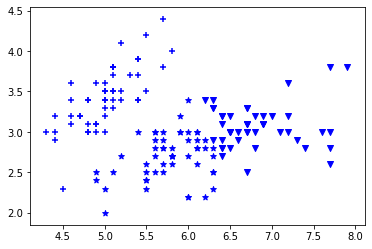

In [80]:
k_3 = KMeans(n_clusters=3)
k_3.fit(data[columns_to_cluster])
print_clustering(data[columns_to_cluster], k_3.labels_)

k=4

k=2

# Jakość grupowania

**Współczynnik SILHOUETTE**

Formally:

* a: Średni dystans między elementem klastra a wszystkimi innymi punktami w tym samym klastrze.
* b: średni dystans między elementem klastra, a wszystkimi innymi punktami w najbliższym klastrze.


$$ s = \frac{b - a }{max(a,b)} $$


Inną metryką poprawności jest **Współczynnik Calińskiego-Harabasza**, 

* N - liczba obserwacji
* k - liczba klastrów

$$W_k = \sum^k_{q=1} \sum_{x \in C_1} (x - c_q)^2$$


$$B_k = \sum^k_{q=1} n_q (c_q -c)^2 $$

$$calinski(k) = \frac{Tr(B_k)}{Tr(W_k)} \times \frac{N-K}{K-1}$$

Napisz pętlę, która przeiteruje przez możliwe k (od 2 do 9), następnie miary dopasowania dodaj do odpowiednich list

In [85]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

k_clusters = []
silhouette = []
calinski = []

for k in range(2, 10):
    km = KMeans(n_clusters=k)
    km.fit(...)
    
    
    k_clusters.append(...)
    silhouette.append(...)
    calinski.append(...)

Wykreśl wartość współczynnika silhouette w zależności od liczby klastrów

A także Calińskiego Harabasza:

Oraz wartości wewnątrzgrupowej sumy kwadratów:

# Inny przykład

Wczytujemy fikcyjne dane dotyczące klientów pewnego banku. Trzy zmienne dotyczą:
* wieku
* przeciętnych zarobków
* przeciętnie odkładanych środków na oszczędności (jako % zarobków)

Twoim zadaniem będzie dokonanie ich klasteryzacji

In [91]:
klienci_banku = pd.read_csv('banking_data.csv')

In [1]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
ax.scatter(klienci_banku['zarobki'], klienci_banku['oszczednosci'], klienci_banku['wiek'])
ax.set_xlabel('Zarobki')
ax.set_ylabel('Oszczednosci')
ax.set_zlabel('Wiek')
ax.view_init(39, 30)
plt.show()

NameError: name 'plt' is not defined

Ale najpierw, policz z odległość między pierwszym i drugim klientem ze zbioru (odległością euklidesową). Aby to zrobić, stwórz funkcję, która przyjmuje dwa wektory i zwraca jedną wartość będącą odległością euklidesową między tymi wektorami

In [2]:
def euclidean_distance(row1, row2):
    return ...

euclidean_distance(...)

TypeError: euclidean_distance() missing 1 required positional argument: 'row2'

Dokonaj standaryzacji danych (od każdej zmiennej odejmij średnią, i podziel przez jej odchylenie standardowe)

In [104]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [106]:
klienci_banku[klienci_banku.columns] = scaler...

Wyświetl za pomocą metod ``.mean_``, ``.scale_`` informację o średniej i odchyleniu jakie były zastosowane w standaryzacji

Przedstaw ramkę

Podaj odległość euklidesową po standaryzacji

In [3]:
# odległość euklidesowa po standaryzacji:
euclidean_distance(...)

TypeError: euclidean_distance() missing 1 required positional argument: 'row2'

Dokonaj klastrowania metodą k-średnich. Przyjmij liczbę skupień jako 3

Do którego skupienia przyporządkowano poszczególne obserwacje?

Jakie są centra skupień? jak byś je scharakteryzował? 
Żeby dane powróciły do poprzedniej formy sprzed standaryzacji wykorzystaj metodę ``inverse_transform()`` obiektu scaler

Przedstaw na wykresie 3D dane, a kolorem oznacz numer skupiska.
W ``ax.scatter`` dodaj parametr ``c=`` i przypisz do niego etykiety grupy do jakich zostały przypisane

Przedstaw miary jakości klastrowania dla tego modelu. Uwzględnij wewnątrzklastrową sumę ochyleń

Za pomocą pętli, przeanalizuj modele k-means dla k z zakresu (2,14), i porównaj miary jakości dopasowania. Ile klastrów byś wybrał?

Wyświetl wykresy różnych metryk poprawności w zależności od liczby wybranych klastrów:

Dokonaj grupowania za pomocą wybranego k, stwórzy wykres 3D z klastrami, wyświetl informacje o średnich i scharakteryzuj tak powstałe klastry klientów banku

# Metoda aglomeracyjna

Przeanalizujemy dane o tych samych klientach banku

In [136]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
# stwórzmy macierz połączeń
linkage_matrix = linkage(klienci_banku, 'ward')

In [137]:
linkage_matrix

array([[143.        , 186.        ,   0.01583355,   2.        ],
       [250.        , 258.        ,   0.0164815 ,   2.        ],
       [217.        , 220.        ,   0.01794004,   2.        ],
       [ 36.        , 154.        ,   0.01807331,   2.        ],
       [142.        , 264.        ,   0.0264094 ,   2.        ],
       [238.        , 292.        ,   0.02748254,   2.        ],
       [ 64.        , 200.        ,   0.04153154,   2.        ],
       [131.        , 189.        ,   0.0432363 ,   2.        ],
       [ 69.        , 169.        ,   0.04392908,   2.        ],
       [126.        , 152.        ,   0.04435238,   2.        ],
       [ 14.        ,  94.        ,   0.04515882,   2.        ],
       [191.        , 305.        ,   0.05159059,   2.        ],
       [ 55.        , 293.        ,   0.05504662,   2.        ],
       [ 77.        , 133.        ,   0.05790951,   2.        ],
       [ 53.        , 271.        ,   0.05994129,   2.        ],
       [233.        , 269

Tworzymy wykres dendrogramu:

Za pomocą odpowiednich współczynników sprawdź, które z rodzajów połączeń między klastrami daje najlepsze wyniki. Zajrzyj do dokumentacji funkcji linkage (np ``single, complete, average, weighted, centroid, median``)

Za pomocą funkcji ``fluster`` możemy automatycznie przypisać każdemu obiektowi numer jego klastra określając zadaną przez nas liczbę klastrów ``criterion='maxclust'`` bądź odległości przy której podzielić klastry: ``criterion='distance'``

Za pomocą współczynnika silhouette porównaj jakość klastrowania hierarchicznego dla danych podzielonych na trzy klastry za pomocą:
- metody warda
- metody pojedynczego łączenia
- metody średniej

## Grupowanie k-modes

Wczytaj dane dotyczące klientów banku z pliku csv ``bankmarketing.csv`` bądź ze strony: https://www.kaggle.com/ashydv/bank-marketing

In [169]:
data = pd.read_csv('bankmarketing.csv')

Wyświetl typy danych, i za pomocą metody .value_counts() podaj statystyki dla zmiennych 'job', 'marital', 'education', 'housing'

Za pomocą funkcji pd.bin przekonwertuj wiek do zmiennej kategorialnej. Kategorie - [0-20], [20-30], [30-40] itd... (zobacz wcześniej jaka jest wartość maksymalna i minimalna

Stwórz nową ramkę tylko z pięcioma zmiennymi kategorialnymi i opisz ją za pomocą metody .describe()

Zakoduj wszystkie z pięciu zmiennych za pomocą modułu preprocessing

In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()


Zainstaluj, zaimportuj i wykorzystaj bibliotekę k-modes, a także uzyj jej do klastrowania cech klientów

In [182]:
from kmodes.kmodes import KModes

In [5]:
km = KModes(n_clusters=2, init = "Huang", n_init = 5, verbose=1)
fitClusters_cao = km.fit_predict(bank_cust)

NameError: name 'KModes' is not defined

In [6]:
km.cluster_centroids_

NameError: name 'km' is not defined

Przeprowadź analizę wartości funkcji kosztu w zależności od liczby k

I przedstaw na wykresie:

Informację o numerze klastra połącz z oryginalną ramką danych, a następnie wyświetl informacje o elementach z klastra

Dla każdego klastra przedstaw statystyki częstości według danej ramki. Będzie to kwestia zrobienia pętli po zmiennych i wyprintowania: ``value_counts(normalize=True)``dla każdej kolumny.

## DBSCAN

In [8]:
from sklearn.cluster import DBSCAN

Dokonaj klasteryzacji metodą DBSCAN

In [9]:
clus = DBSCAN(eps=1, min_samples=2).fit_predict(klienci_banku)

NameError: name 'klienci_banku' is not defined

Wyświetl klastry do których należy każda z obserwacji

In [233]:
clus

array([ 0,  1,  1,  1,  1,  0,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  1,  0,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,
        0,  1,  1,  1,  0,  0,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1, -1,  1,  1,  1,  1,  1,
        1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  0,  1,  1,  0,  1,  1,  1,  1,  1,  0,  1,  1,  1,  0,  1,
        1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  0,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

A także przedstaw na wykresie 3D

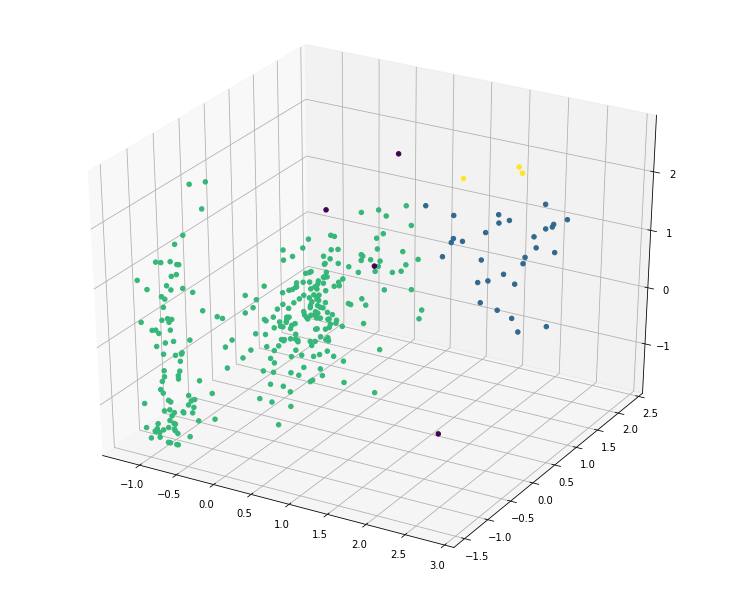

In [234]:
fig = plt.figure(figsize=(10,8))
ax = Axes3D(fig)
ax.scatter(klienci_banku['zarobki'], klienci_banku['oszczednosci'], klienci_banku['wiek'], c=clus,depthshade=False)
plt.show()

## Porównanie metod clusteringu na danych o różnej strukturze

In [12]:
from sklearn import datasets

n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

varied = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5],random_state=random_state)

Powyżej wygenerowano kilka zbiorów danych 2D o różnej strukturze. Twoim zadaniem jest dokonanie klasteryzacji wszystkimi poznanymi metodami (k-means, hierarchiczne, dbscan), oraz przedstawienie wizualnie efektów klastrowania dla każdego ze zbiorów danych. Przykładowe klastrowanie k-means dla zbioru noisy_circles:

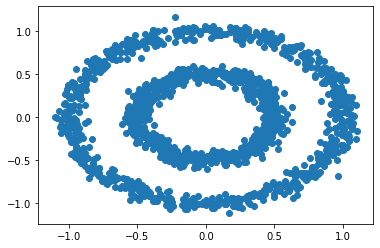

In [32]:
plt.scatter(noisy_circles[0][:,0], noisy_circles[0][:,1])

In [36]:
km_noisy = KMeans(n_clusters=2)
labels = km_noisy.fit_predict(noisy_circles[0])

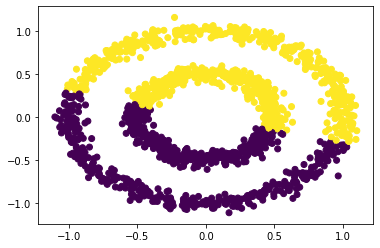

In [41]:
plt.scatter(noisy_circles[0][:,0], noisy_circles[0][:,1], c=labels)